## Name: Shivkumar G. Chauhan
### Roll No.: CS8A53
### Batch A-3
---
# Experiment - 1 : Descriptive and Infrential statastics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## imports

In [2]:
import pandas
import numpy
import statistics
import scipy.stats
import matplotlib.pyplot as pyplot
import warnings

## Configurations

In [3]:
# %matplotlib qt
%matplotlib inline
pyplot.rcParams["figure.figsize"] = (15, 12)

In [4]:
warnings.filterwarnings('ignore')

In [7]:
Data=pandas.read_csv("../Data/Raw_Data/16_01_2023_WorldWide.csv")

In [8]:
Data.columns

Index(['iso_code', 'continent', 'location', 'last_updated_date', 'total_cases',
       'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothe

In [9]:
Selected_Columns=['iso_code', 'continent', 'location', 'last_updated_date', 'total_cases',
       'new_cases', 'total_deaths', 'new_deaths','population']

In [10]:
Data=Data[Selected_Columns]

In [11]:
Numerical_Columns=Data.describe().columns

In [12]:
Numerical_Columns

Index(['total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'population'], dtype='object')

In [13]:
Data=Data.sort_values(by="total_cases",ascending=False)

# Data Exploration

In [14]:
Data

,iso_code,continent,location,last_updated_date,total_cases,new_cases,total_deaths,new_deaths,population
233,OWID_WRL,NaN,World,2023-01-16,666879519.0,195295.0,6723297.0,814.0,7.975105e+09
91,OWID_HIC,NaN,High income,2023-01-16,423860182.0,177208.0,2813965.0,618.0,1.250515e+09
69,OWID_EUR,NaN,Europe,2023-01-15,245913988.0,7266.0,2012174.0,64.0,7.448078e+08
11,OWID_ASI,NaN,Asia,2023-01-16,207134786.0,151942.0,1526561.0,576.0,4.721383e+09
70,OWID_EUN,NaN,European Union,2023-01-15,182467840.0,1981.0,1199738.0,13.0,4.501468e+08
...,...,...,...,...,...,...,...,...,...
107,JEY,Europe,Jersey,2023-01-08,NaN,NaN,NaN,NaN,1.107960e+05
158,OWID_CYN,Asia,Northern Cyprus,2023-01-12,NaN,NaN,NaN,NaN,3.828360e+05
159,OWID_NIR,Europe,Northern Ireland,2023-01-11,NaN,NaN,NaN,NaN,1.896000e+06
186,OWID_SCT,Europe,Scotland,2023-01-09,NaN,NaN,NaN,NaN,5.466000e+06


In [15]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237 entries, 233 to 231
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   iso_code           237 non-null    object 
 1   continent          224 non-null    object 
 2   location           237 non-null    object 
 3   last_updated_date  237 non-null    object 
 4   total_cases        231 non-null    float64
 5   new_cases          231 non-null    float64
 6   total_deaths       227 non-null    float64
 7   new_deaths         227 non-null    float64
 8   population         236 non-null    float64
dtypes: float64(5), object(4)
memory usage: 18.5+ KB


In [16]:
Data.describe()

,total_cases,new_cases,total_deaths,new_deaths,population
count,2.310000e+02,231.000000,2.270000e+02,227.000000,2.360000e+02
mean,1.233744e+07,4587.558442,1.237569e+05,34.096916,1.371974e+08
std,5.887474e+07,22147.187638,5.664904e+05,133.423968,6.832297e+08
min,1.000000e+00,0.000000,1.000000e+00,0.000000,8.080000e+02
25%,3.212200e+04,0.000000,2.965000e+02,0.000000,8.297690e+05
50%,2.855350e+05,0.000000,3.164000e+03,0.000000,6.909971e+06
75%,2.174490e+06,305.500000,2.046450e+04,1.000000,3.353106e+07
max,6.668795e+08,195295.000000,6.723297e+06,1018.000000,7.975105e+09


In [17]:
Data.describe(include="all")

,iso_code,continent,location,last_updated_date,total_cases,new_cases,total_deaths,new_deaths,population
count,237,224,237,237,2.310000e+02,231.000000,2.270000e+02,227.000000,2.360000e+02
unique,237,6,237,7,NaN,NaN,NaN,NaN,NaN
top,OWID_WRL,Africa,World,2023-01-15,NaN,NaN,NaN,NaN,NaN
freq,1,55,1,215,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,1.233744e+07,4587.558442,1.237569e+05,34.096916,1.371974e+08
std,NaN,NaN,NaN,NaN,5.887474e+07,22147.187638,5.664904e+05,133.423968,6.832297e+08
min,NaN,NaN,NaN,NaN,1.000000e+00,0.000000,1.000000e+00,0.000000,8.080000e+02
25%,NaN,NaN,NaN,NaN,3.212200e+04,0.000000,2.965000e+02,0.000000,8.297690e+05
50%,NaN,NaN,NaN,NaN,2.855350e+05,0.000000,3.164000e+03,0.000000,6.909971e+06
75%,NaN,NaN,NaN,NaN,2.174490e+06,305.500000,2.046450e+04,1.000000,3.353106e+07


## Data Reduction

here some countries have NULL Values in their specific columns, so dropping the columns without filling it

In [18]:
Data.isnull().any()

iso_code             False
continent             True
location             False
last_updated_date    False
total_cases           True
new_cases             True
total_deaths          True
new_deaths            True
population            True
dtype: bool

In [19]:
Data.isnull().sum()

iso_code              0
continent            13
location              0
last_updated_date     0
total_cases           6
new_cases             6
total_deaths         10
new_deaths           10
population            1
dtype: int64

In [20]:
Data=Data.dropna()

In [21]:
Data

,iso_code,continent,location,last_updated_date,total_cases,new_cases,total_deaths,new_deaths,population
223,USA,North America,United States,2023-01-15,101648826.0,2718.0,1099860.0,37.0,3.382899e+08
96,IND,Asia,India,2023-01-16,44682378.0,114.0,530726.0,0.0,1.417173e+09
75,FRA,Europe,France,2023-01-15,39482221.0,6238.0,163416.0,101.0,6.781300e+07
80,DEU,Europe,Germany,2023-01-16,37605135.0,10609.0,163775.0,150.0,8.336984e+07
29,BRA,South America,Brazil,2023-01-15,36628099.0,3537.0,695343.0,2.0,2.153135e+08
...,...,...,...,...,...,...,...,...,...
232,WLF,Oceania,Wallis and Futuna,2023-01-15,3427.0,0.0,7.0,0.0,1.159600e+04
126,MAC,Asia,Macao,2023-01-15,3416.0,134.0,106.0,23.0,6.951800e+05
180,SPM,North America,Saint Pierre and Miquelon,2023-01-15,3368.0,0.0,2.0,0.0,5.885000e+03
142,MSR,North America,Montserrat,2023-01-15,1403.0,0.0,8.0,0.0,4.413000e+03


In [22]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 223 to 156
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   iso_code           214 non-null    object 
 1   continent          214 non-null    object 
 2   location           214 non-null    object 
 3   last_updated_date  214 non-null    object 
 4   total_cases        214 non-null    float64
 5   new_cases          214 non-null    float64
 6   total_deaths       214 non-null    float64
 7   new_deaths         214 non-null    float64
 8   population         214 non-null    float64
dtypes: float64(5), object(4)
memory usage: 16.7+ KB


In [23]:
Data.describe(include="all")

,iso_code,continent,location,last_updated_date,total_cases,new_cases,total_deaths,new_deaths,population
count,214,214,214,214,2.140000e+02,214.000000,2.140000e+02,214.000000,2.140000e+02
unique,214,6,214,2,NaN,NaN,NaN,NaN,NaN
top,USA,Africa,United States,2023-01-15,NaN,NaN,NaN,NaN,NaN
freq,1,54,1,204,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,3.116224e+06,2204.953271,3.141721e+04,24.696262,3.721731e+07
std,NaN,NaN,NaN,NaN,9.656967e+06,10433.607141,1.061432e+05,113.340553,1.426430e+08
min,NaN,NaN,NaN,NaN,1.000000e+00,0.000000,1.000000e+00,0.000000,4.413000e+03
25%,NaN,NaN,NaN,NaN,3.307125e+04,0.000000,2.832500e+02,0.000000,8.515890e+05
50%,NaN,NaN,NaN,NaN,2.688750e+05,0.000000,2.794500e+03,0.000000,6.797150e+06
75%,NaN,NaN,NaN,NaN,1.485466e+06,221.750000,1.669100e+04,0.000000,2.620034e+07


In [24]:
Data.describe()

,total_cases,new_cases,total_deaths,new_deaths,population
count,2.140000e+02,214.000000,2.140000e+02,214.000000,2.140000e+02
mean,3.116224e+06,2204.953271,3.141721e+04,24.696262,3.721731e+07
std,9.656967e+06,10433.607141,1.061432e+05,113.340553,1.426430e+08
min,1.000000e+00,0.000000,1.000000e+00,0.000000,4.413000e+03
25%,3.307125e+04,0.000000,2.832500e+02,0.000000,8.515890e+05
50%,2.688750e+05,0.000000,2.794500e+03,0.000000,6.797150e+06
75%,1.485466e+06,221.750000,1.669100e+04,0.000000,2.620034e+07
max,1.016488e+08,108281.000000,1.099860e+06,1018.000000,1.425887e+09


## Mean

In [25]:
Data.mean()

total_cases     3.116224e+06
new_cases       2.204953e+03
total_deaths    3.141721e+04
new_deaths      2.469626e+01
population      3.721731e+07
dtype: float64

## Median

In [26]:
Data.median()

total_cases      268875.0
new_cases             0.0
total_deaths       2794.5
new_deaths            0.0
population      6797149.5
dtype: float64

## Mode

In [27]:
Data.mode()

,iso_code,continent,location,last_updated_date,total_cases,new_cases,total_deaths,new_deaths,population
0,ABW,Africa,Afghanistan,2023-01-15,1.0,0.0,1.0,0.0,4.413000e+03
1,AFG,NaN,Albania,NaN,1403.0,NaN,17.0,NaN,5.885000e+03
2,AGO,NaN,Algeria,NaN,3368.0,NaN,21.0,NaN,1.159600e+04
3,AIA,NaN,Andorra,NaN,3416.0,NaN,121.0,NaN,1.269100e+04
4,ALB,NaN,Angola,NaN,3427.0,NaN,138.0,NaN,1.587700e+04
...,...,...,...,...,...,...,...,...,...
209,WSM,NaN,Vietnam,NaN,36628099.0,NaN,NaN,NaN,2.358249e+08
210,YEM,NaN,Wallis and Futuna,NaN,37605135.0,NaN,NaN,NaN,2.755013e+08
211,ZAF,NaN,Yemen,NaN,39482221.0,NaN,NaN,NaN,3.382899e+08
212,ZMB,NaN,Zambia,NaN,44682378.0,NaN,NaN,NaN,1.417173e+09


## Quantile Ranges

In [28]:
Data.quantile(0.25)

total_cases      33071.25
new_cases            0.00
total_deaths       283.25
new_deaths           0.00
population      851589.00
Name: 0.25, dtype: float64

In [29]:
Data.quantile(0.75)

total_cases      1485466.25
new_cases            221.75
total_deaths       16691.00
new_deaths             0.00
population      26200339.00
Name: 0.75, dtype: float64

In [30]:
Inter_quartile_range=Data.quantile(0.75)-Data.quantile(0.25)

In [31]:
Inter_quartile_range

total_cases      1452395.00
new_cases            221.75
total_deaths       16407.75
new_deaths             0.00
population      25348750.00
dtype: float64

In [32]:
Data[Numerical_Columns]

,total_cases,new_cases,total_deaths,new_deaths,population
223,101648826.0,2718.0,1099860.0,37.0,3.382899e+08
96,44682378.0,114.0,530726.0,0.0,1.417173e+09
75,39482221.0,6238.0,163416.0,101.0,6.781300e+07
80,37605135.0,10609.0,163775.0,150.0,8.336984e+07
29,36628099.0,3537.0,695343.0,2.0,2.153135e+08
...,...,...,...,...,...
232,3427.0,0.0,7.0,0.0,1.159600e+04
126,3416.0,134.0,106.0,23.0,6.951800e+05
180,3368.0,0.0,2.0,0.0,5.885000e+03
142,1403.0,0.0,8.0,0.0,4.413000e+03


In [33]:
len(Data.max()[4:])

5

## Harmonic Mean

In [34]:
statistics.harmonic_mean(Data[Numerical_Columns[3]])

0

In [35]:
[
    Numerical_Columns[i]+": "+str(statistics.harmonic_mean(Data[Numerical_Columns[i]])) for i in range(len(Numerical_Columns))
]

['total_cases: 212.565994299055',
 'new_cases: 0',
 'total_deaths: 53.02554207208648',
 'new_deaths: 0',
 'population: 171183.99294536182']

## Geometric Mean

In [36]:
scipy.stats.mstats.gmean(Data[Numerical_Columns[3]])

0.0

In [37]:
[
    Numerical_Columns[i]+": "+str(scipy.stats.mstats.gmean(Data[Numerical_Columns[i]]))  for i in range(len(Numerical_Columns))
]

['total_cases: 246539.47224773892',
 'new_cases: 0.0',
 'total_deaths: 2092.6975344810357',
 'new_deaths: 0.0',
 'population: 4224812.6670721555']

## Skewness

In [38]:
Data.skew()

total_cases     6.451380
new_cases       7.787298
total_deaths    6.873911
new_deaths      6.680284
population      8.765136
dtype: float64

## Kurtosis

In [39]:
Data.kurtosis()

total_cases     54.402086
new_cases       68.482930
total_deaths    57.379541
new_deaths      48.833180
population      82.817356
dtype: float64

## Box Plots

<AxesSubplot: >

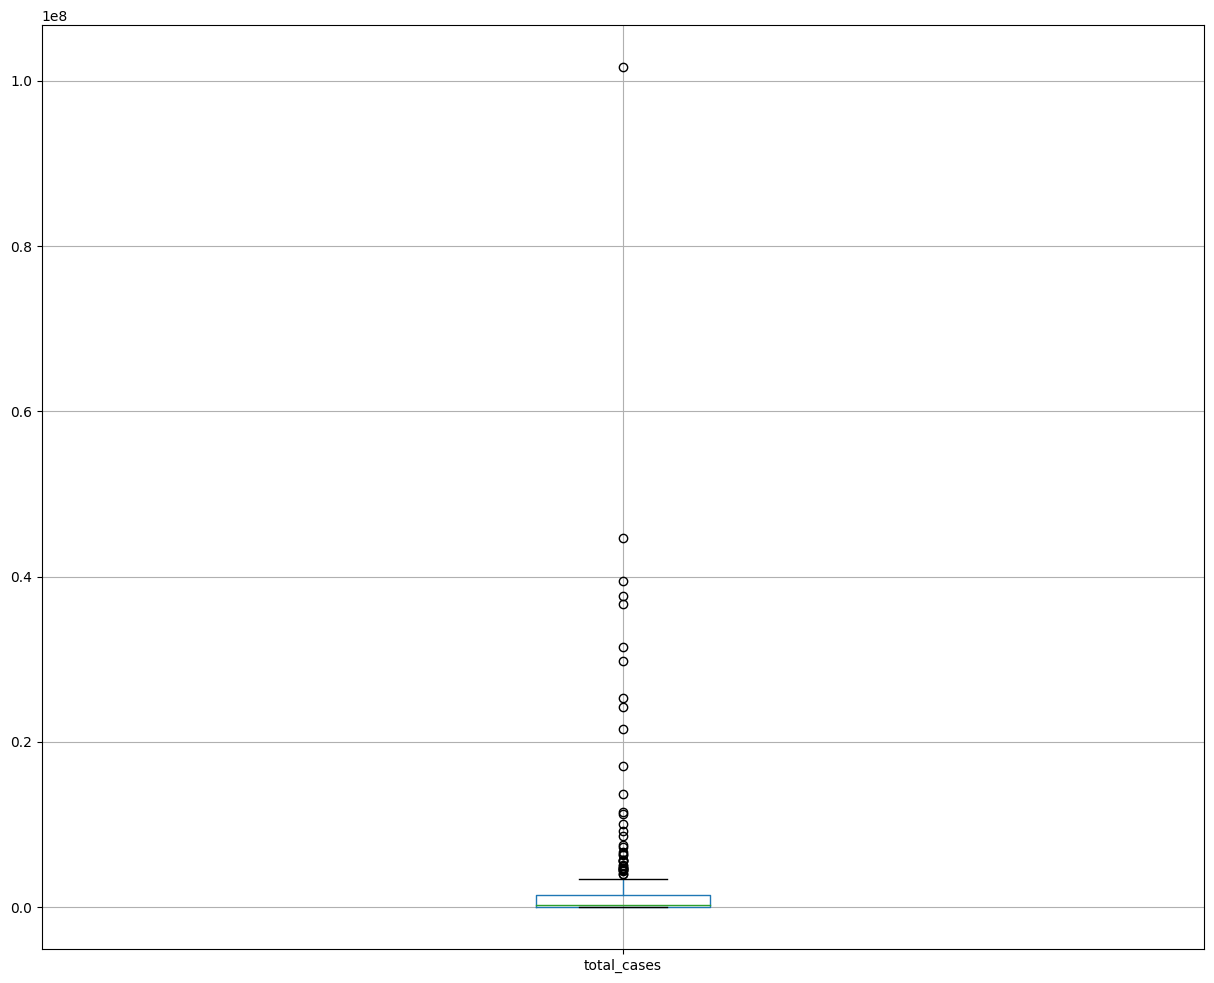

In [40]:
Data.boxplot("total_cases")

<AxesSubplot: >

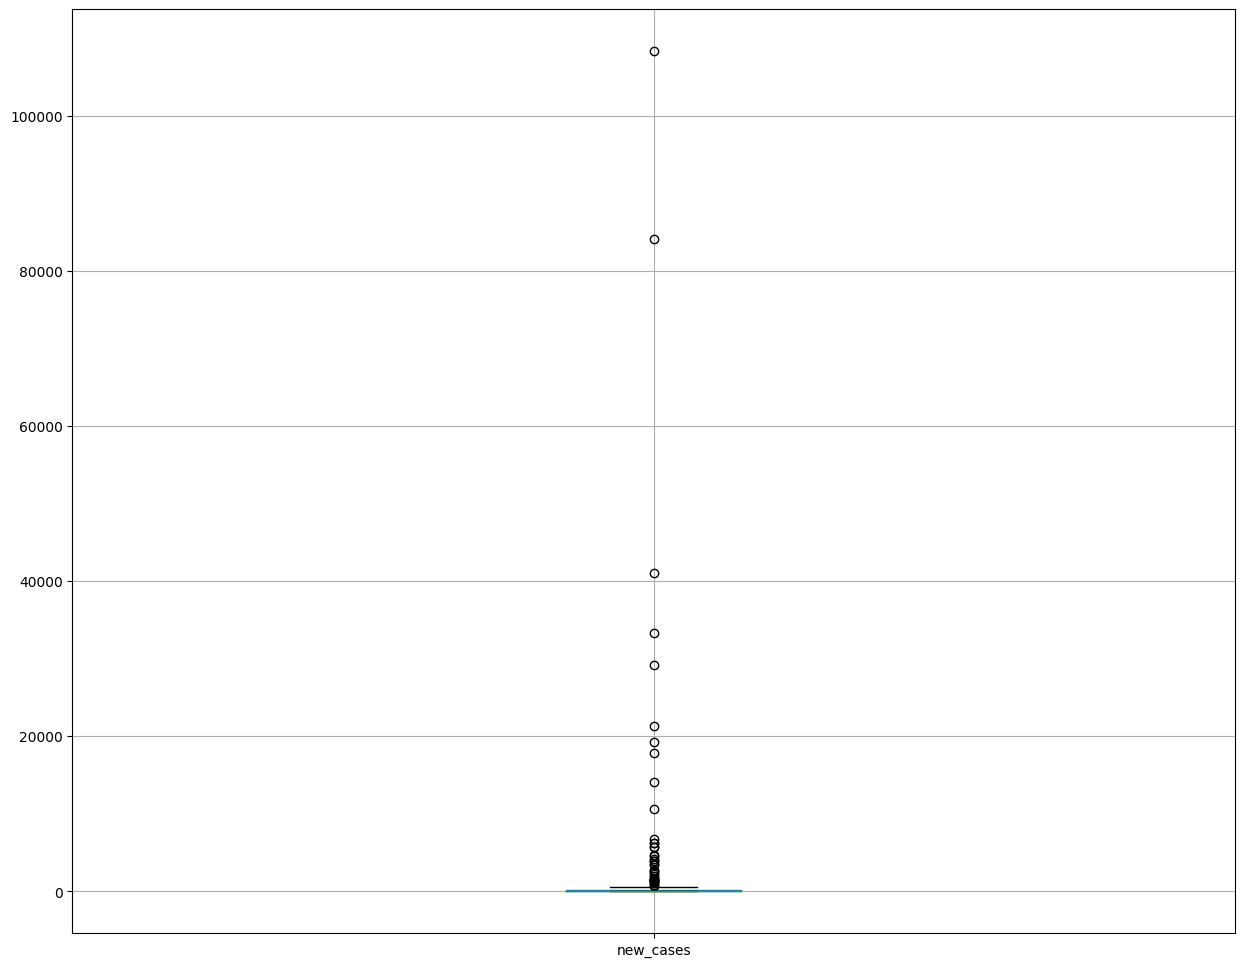

In [41]:
Data.boxplot('new_cases')

<AxesSubplot: >

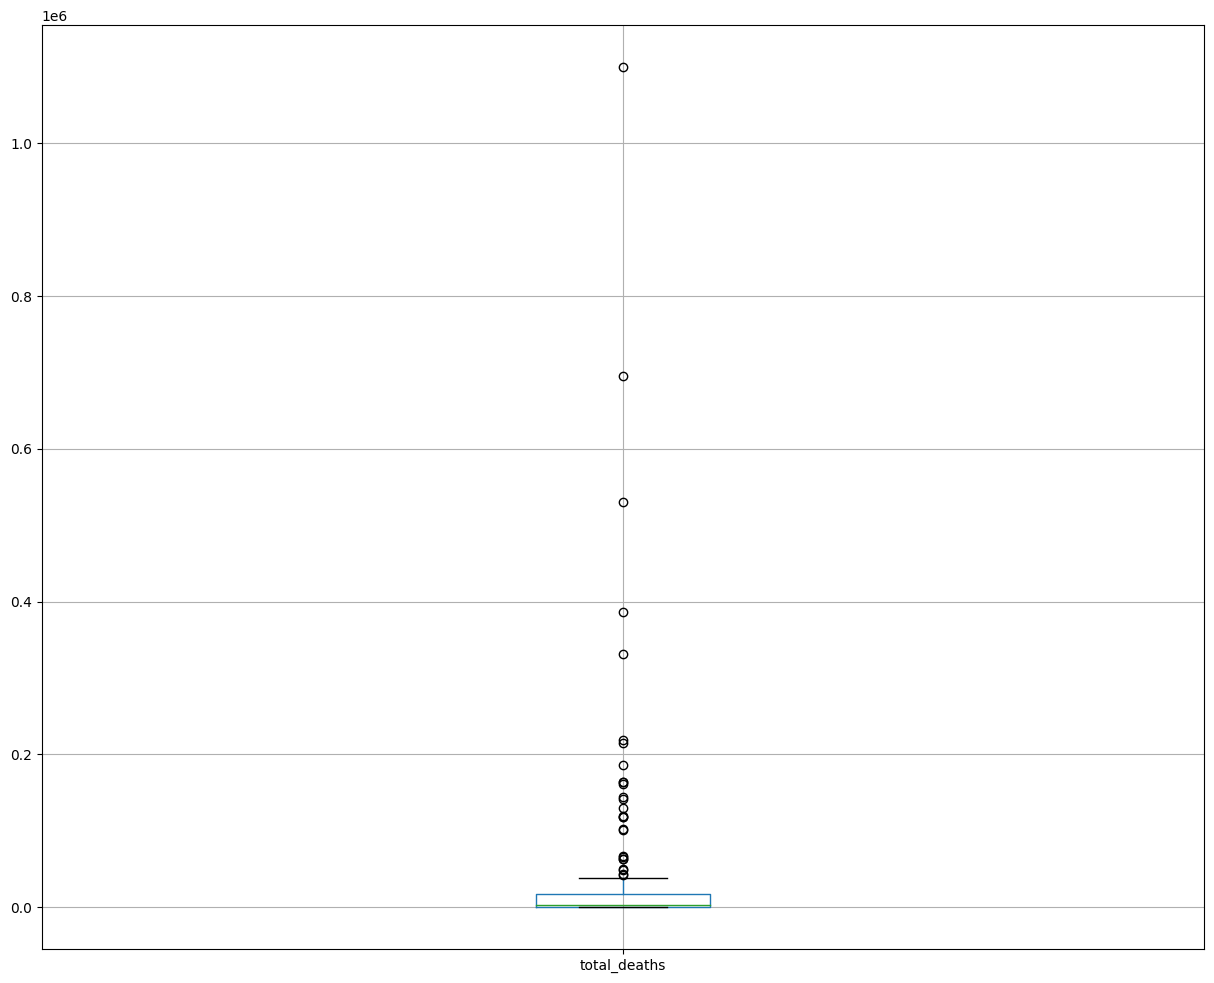

In [42]:
Data.boxplot("total_deaths")

<AxesSubplot: >

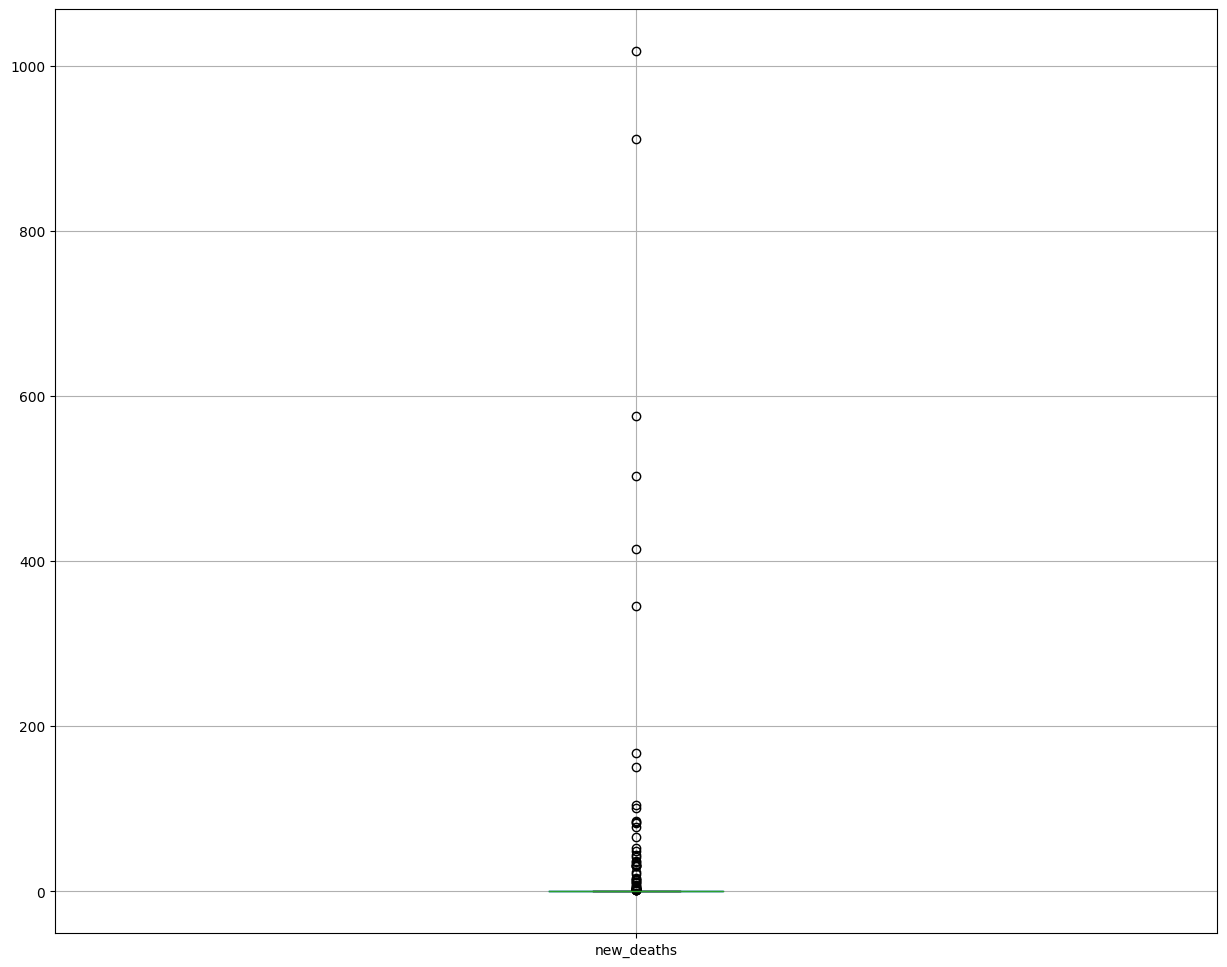

In [43]:
Data.boxplot("new_deaths")

<AxesSubplot: >

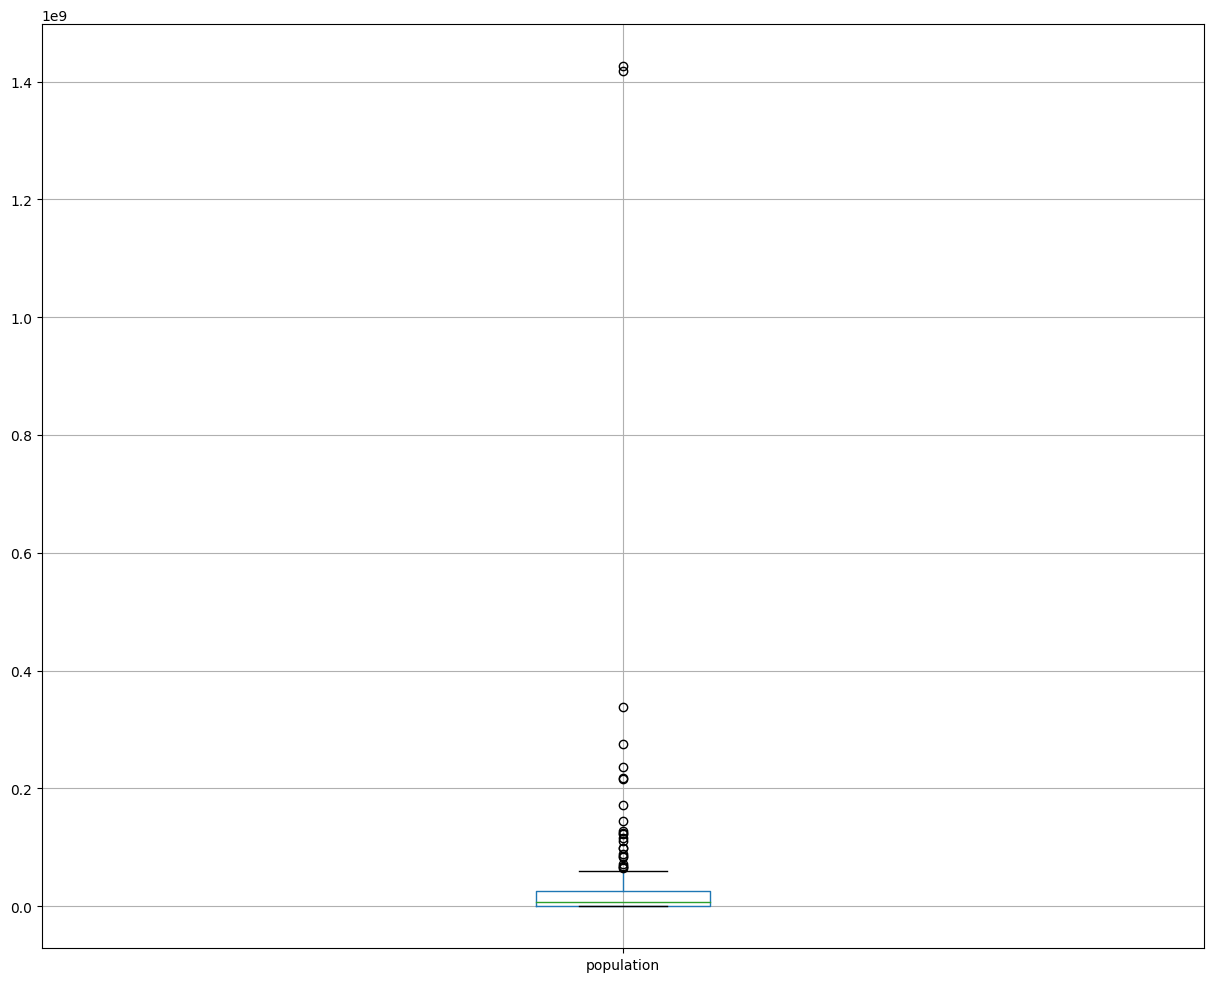

In [44]:
Data.boxplot("population")

<AxesSubplot: >

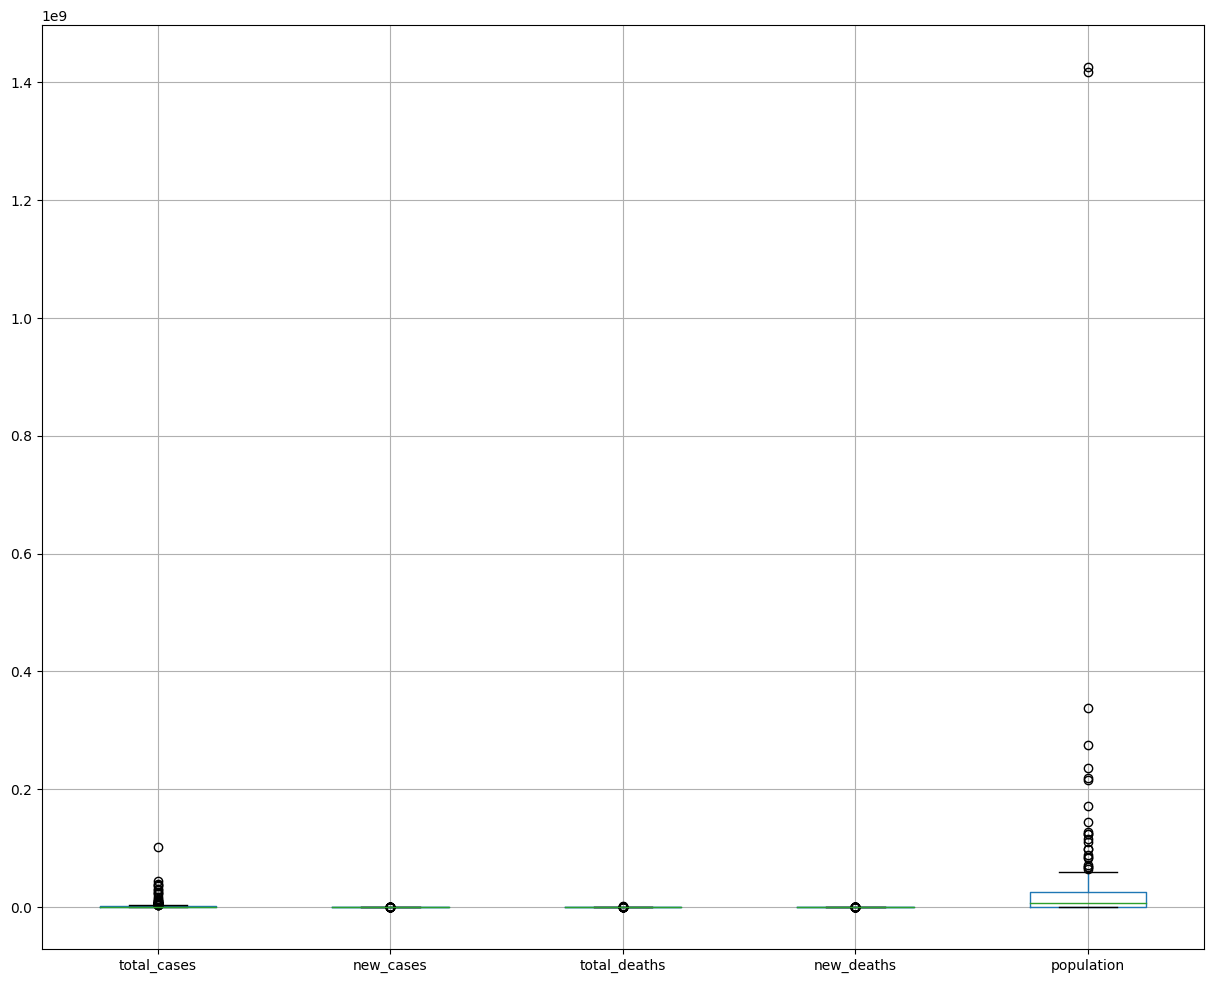

In [45]:
Data.boxplot()

## Bar Graph

In [46]:
len(list(Data['location']))

214

<AxesSubplot: xlabel='location'>

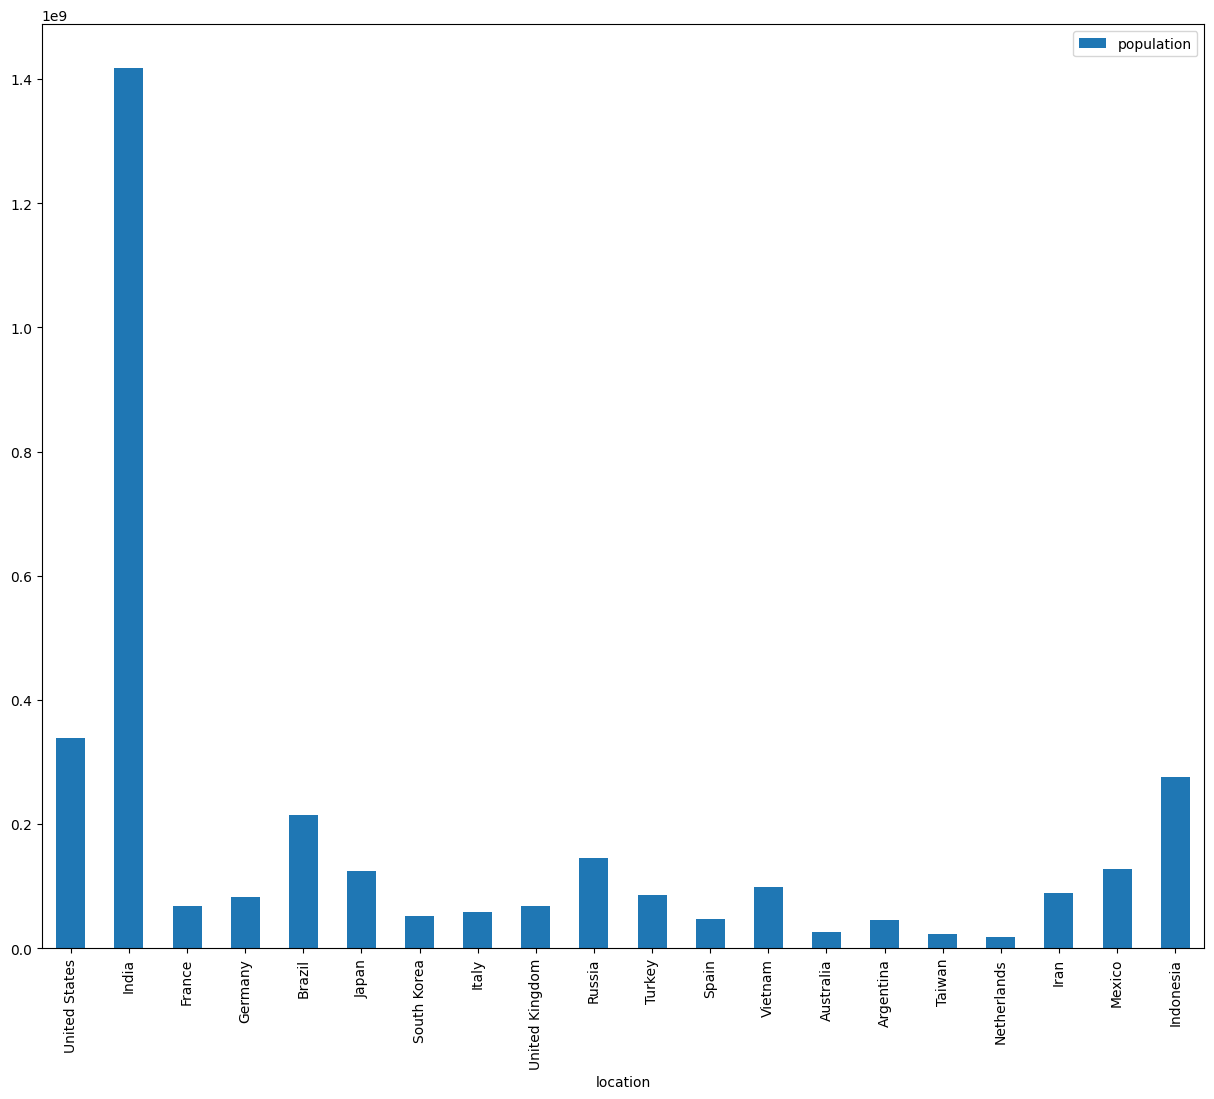

In [47]:
Data[:20].plot.bar(x='location',y=['population'])

## PieChart

([<matplotlib.patches.Wedge at 0x1d086367b80>,
 [Text(0.902766541519911, 0.6285002557773377, 'United States'),
  Text(0.09571890176951527, 1.095827491827084, 'India'),
  Text(-0.44494888974755953, 1.0059922889925224, 'France'),
  Text(-0.846160570015106, 0.7028600783596342, 'Germany'),
  Text(-1.0660721445791965, 0.27109072752920305, 'Brazil'),
  Text(-1.0862578451474445, -0.17333174508909388, 'Japan'),
  Text(-0.9519928419050199, -0.5510985655593779, 'South Korea'),
  Text(-0.7219035374745659, -0.829973061359047, 'Italy'),
  Text(-0.4476042783167936, -1.0048136195496669, 'United Kingdom'),
  Text(-0.1590512285200651, -1.0884404929559808, 'Russia'),
  Text(0.0942521926498015, -1.0959546177560022, 'Turkey'),
  Text(0.2931825574773397, -1.0602094076129709, 'Spain'),
  Text(0.44932616594130786, -1.0040448180238193, 'Vietnam'),
  Text(0.5815444611379863, -0.9337055422989248, 'Australia'),
  Text(0.6952522694694467, -0.8524225957807454, 'Argentina'),
  Text(0.7884409166499942, -0.7670468831

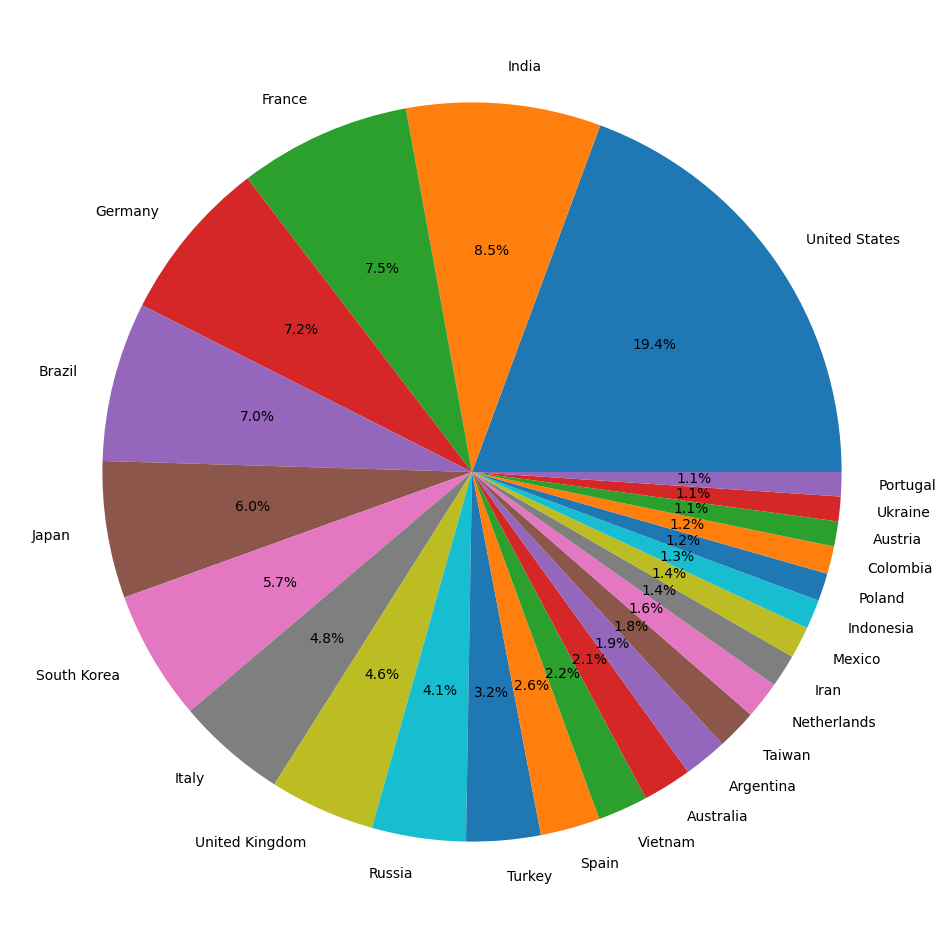

In [48]:
# Data[:25].plot(kind="pie",y='total_cases',label='location')
pyplot.pie(Data[:25]['total_cases'],labels=Data[:25]['location'],autopct='%1.1f%%')

## Line Graph

<AxesSubplot: xlabel='location'>

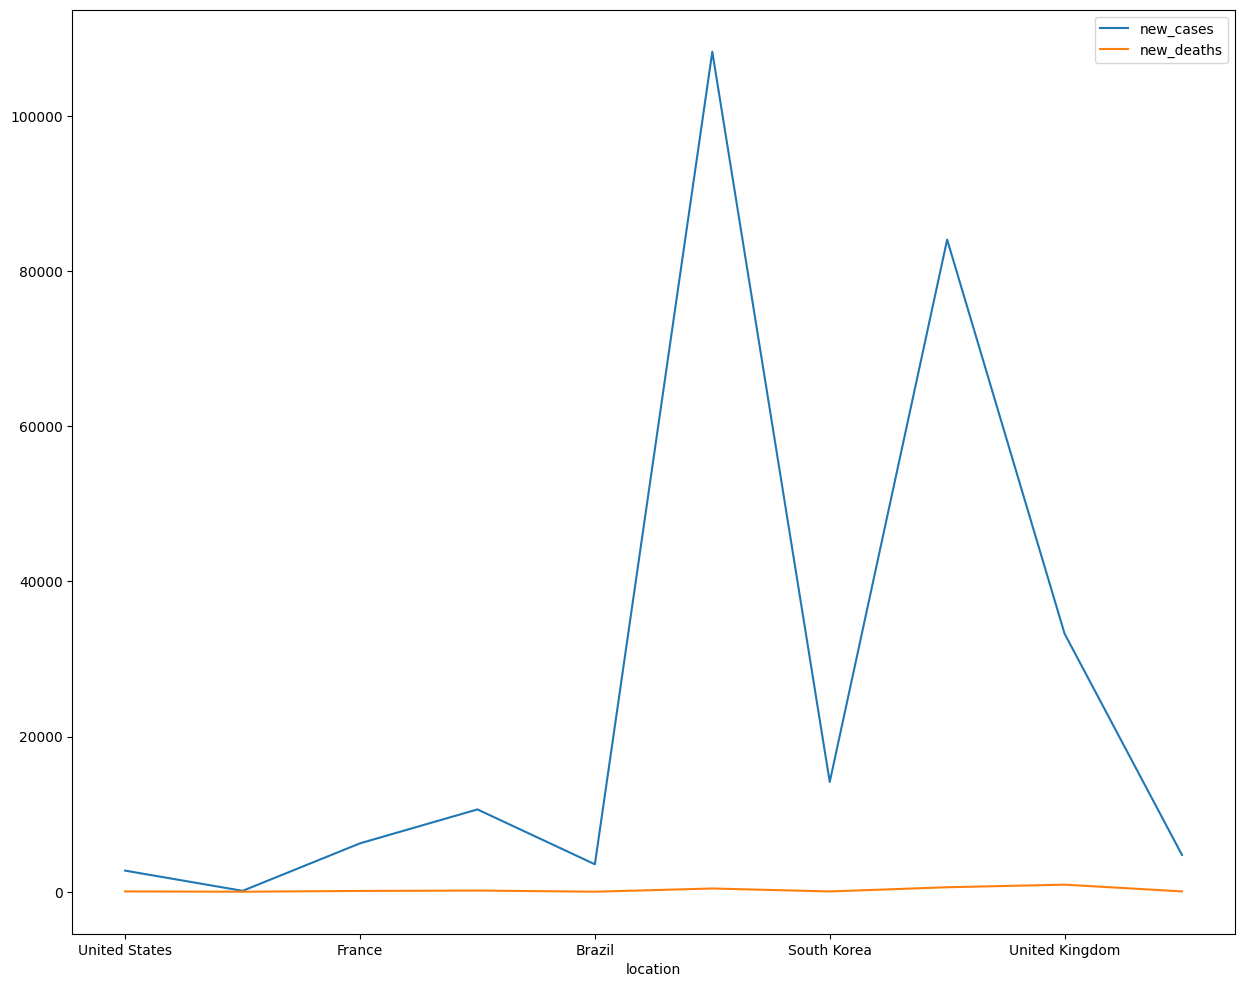

In [49]:
Data[:10].plot(kind="line",x='location',y=['new_cases','new_deaths'])

<AxesSubplot: xlabel='location'>

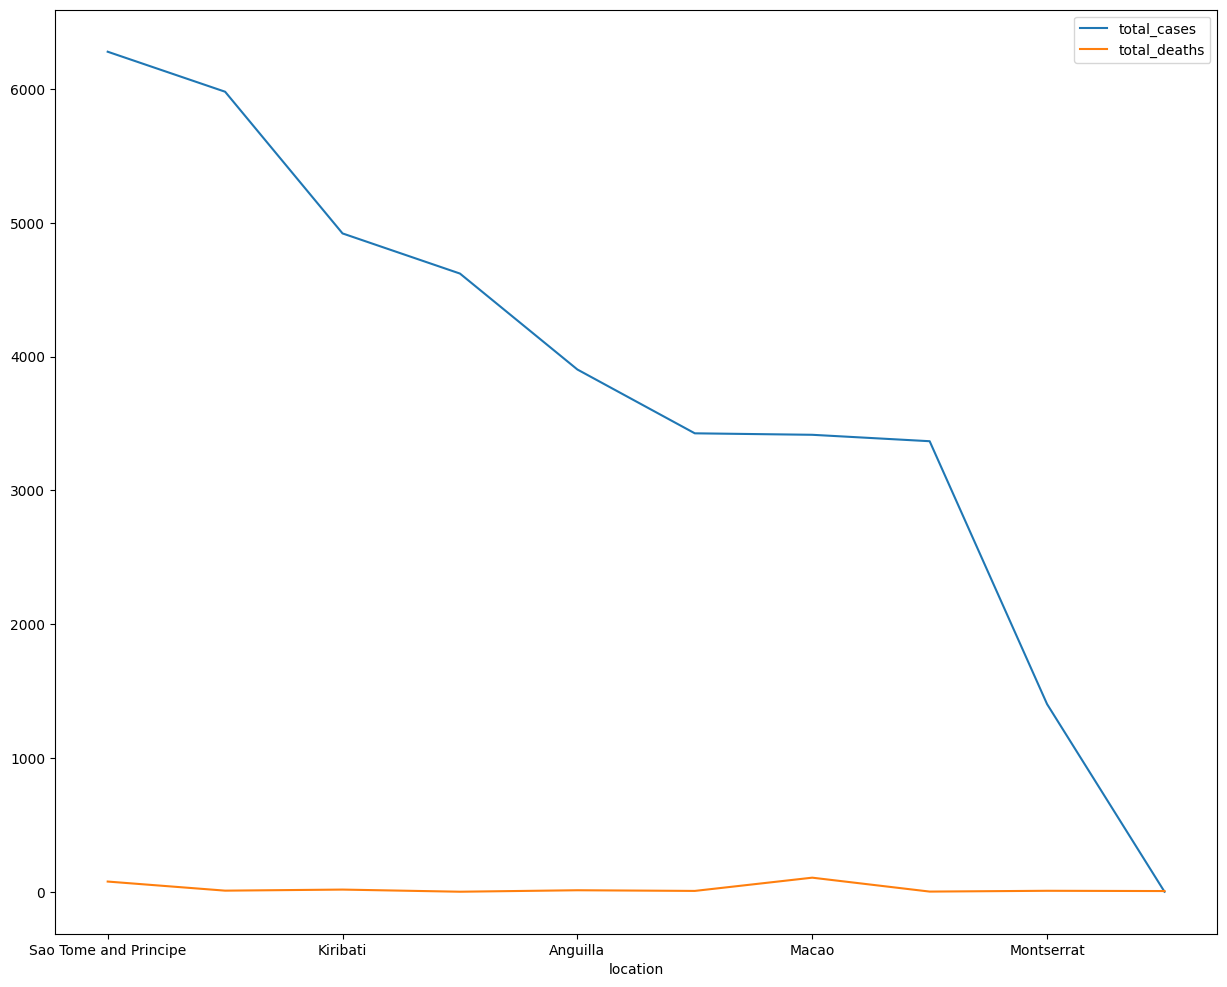

In [50]:
Data[-10:].plot(kind="line",x='location',y=['total_cases','total_deaths'])

## Correlation

In [51]:
Correlation_Data=Data.corr()
Correlation_Data.columns=["correlation_with_"+column for column in Numerical_Columns]

In [52]:
Correlation_Data

,correlation_with_total_cases,correlation_with_new_cases,correlation_with_total_deaths,correlation_with_new_deaths,correlation_with_population
total_cases,1.000000,0.361065,0.876119,0.274007,0.387156
new_cases,0.361065,1.000000,0.159563,0.636917,0.047318
total_deaths,0.876119,0.159563,1.000000,0.161044,0.418043
new_deaths,0.274007,0.636917,0.161044,1.000000,0.067145
population,0.387156,0.047318,0.418043,0.067145,1.000000


## Covariance

In [53]:
Covarience_data=Data.cov()
Covarience_data.columns=["covarience_with_"+column for column in Numerical_Columns]

In [54]:
Covarience_data

,covarience_with_total_cases,covarience_with_new_cases,covarience_with_total_deaths,covarience_with_new_deaths,covarience_with_population
total_cases,9.325700e+13,3.637982e+10,8.980402e+11,2.999083e+08,5.333075e+14
new_cases,3.637982e+10,1.088602e+08,1.767086e+08,7.531862e+05,7.042250e+10
total_deaths,8.980402e+11,1.767086e+08,1.126638e+10,1.937413e+06,6.329416e+12
new_deaths,2.999083e+08,7.531862e+05,1.937413e+06,1.284608e+04,1.085547e+09
population,5.333075e+14,7.042250e+10,6.329416e+12,1.085547e+09,2.034704e+16


# Gathering All Values Together

In [55]:
Statastics_Data=pandas.DataFrame()

In [56]:
Statastics_Data.columns

Index([], dtype='object')

In [57]:
Statastics_Data['mean']=Data.mean()

In [58]:
Statastics_Data['median']=Data.median()

In [59]:
Statastics_Data['skew']=Data.skew()

In [60]:
Statastics_Data['kurtosis']=Data.kurtosis()

In [61]:
Statastics_Data['first_quartile']=Data.quantile(0.25)

In [62]:
Statastics_Data['third_quartile']=Data.quantile(0.75)

In [63]:
Statastics_Data['inter_quartile_range']=Inter_quartile_range

In [64]:
Data.min()[4:]

total_cases        1.0
new_cases          0.0
total_deaths       1.0
new_deaths         0.0
population      4413.0
dtype: object

In [65]:
Statastics_Data['max']=Data.max()[len(Numerical_Columns)-1:]

In [66]:
Statastics_Data['min']=Data.min()[len(Numerical_Columns)-1:]

In [67]:
Statastics_Data['harmonic_mean']=[
   statistics.harmonic_mean(Data[Numerical_Columns[i]]) for i in range(len(Numerical_Columns))
]

In [68]:
Statastics_Data['geometric_mean']=[
   scipy.stats.mstats.gmean(Data[Numerical_Columns[i]])  for i in range(len(Numerical_Columns))
]

In [69]:
Statastics_Data=pandas.concat([Statastics_Data,Correlation_Data,Covarience_data],axis=1)

In [70]:
Statastics_Data

,mean,median,skew,kurtosis,first_quartile,third_quartile,inter_quartile_range,max,min,harmonic_mean,...,correlation_with_total_cases,correlation_with_new_cases,correlation_with_total_deaths,correlation_with_new_deaths,correlation_with_population,covarience_with_total_cases,covarience_with_new_cases,covarience_with_total_deaths,covarience_with_new_deaths,covarience_with_population
total_cases,3.116224e+06,268875.0,6.451380,54.402086,33071.25,1485466.25,1452395.00,101648826.0,1.0,212.565994,...,1.000000,0.361065,0.876119,0.274007,0.387156,9.325700e+13,3.637982e+10,8.980402e+11,2.999083e+08,5.333075e+14
new_cases,2.204953e+03,0.0,7.787298,68.482930,0.00,221.75,221.75,108281.0,0.0,0.000000,...,0.361065,1.000000,0.159563,0.636917,0.047318,3.637982e+10,1.088602e+08,1.767086e+08,7.531862e+05,7.042250e+10
total_deaths,3.141721e+04,2794.5,6.873911,57.379541,283.25,16691.00,16407.75,1099860.0,1.0,53.025542,...,0.876119,0.159563,1.000000,0.161044,0.418043,8.980402e+11,1.767086e+08,1.126638e+10,1.937413e+06,6.329416e+12
new_deaths,2.469626e+01,0.0,6.680284,48.833180,0.00,0.00,0.00,1018.0,0.0,0.000000,...,0.274007,0.636917,0.161044,1.000000,0.067145,2.999083e+08,7.531862e+05,1.937413e+06,1.284608e+04,1.085547e+09
population,3.721731e+07,6797149.5,8.765136,82.817356,851589.00,26200339.00,25348750.00,1425887360.0,4413.0,171183.992945,...,0.387156,0.047318,0.418043,0.067145,1.000000,5.333075e+14,7.042250e+10,6.329416e+12,1.085547e+09,2.034704e+16


In [71]:
Statastics_Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, total_cases to population
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   mean                           5 non-null      float64
 1   median                         5 non-null      float64
 2   skew                           5 non-null      float64
 3   kurtosis                       5 non-null      float64
 4   first_quartile                 5 non-null      float64
 5   third_quartile                 5 non-null      float64
 6   inter_quartile_range           5 non-null      float64
 7   max                            5 non-null      object 
 8   min                            5 non-null      object 
 9   harmonic_mean                  5 non-null      float64
 10  geometric_mean                 5 non-null      float64
 11  correlation_with_total_cases   5 non-null      float64
 12  correlation_with_new_cases     5 non-nul

In [72]:
list(Statastics_Data)[:11]

['mean',
 'median',
 'skew',
 'kurtosis',
 'first_quartile',
 'third_quartile',
 'inter_quartile_range',
 'max',
 'min',
 'harmonic_mean',
 'geometric_mean']

In [73]:
Statastics_Data.iloc[1,:]

mean                                    2204.953271
median                                          0.0
skew                                       7.787298
kurtosis                                   68.48293
first_quartile                                  0.0
third_quartile                               221.75
inter_quartile_range                         221.75
max                                        108281.0
min                                             0.0
harmonic_mean                                   0.0
geometric_mean                                  0.0
correlation_with_total_cases               0.361065
correlation_with_new_cases                      1.0
correlation_with_total_deaths              0.159563
correlation_with_new_deaths                0.636917
correlation_with_population                0.047318
covarience_with_total_cases        36379818481.1259
covarience_with_new_cases          108860157.979027
covarience_with_total_deaths       176708618.371155
covarience_w

<AxesSubplot: >

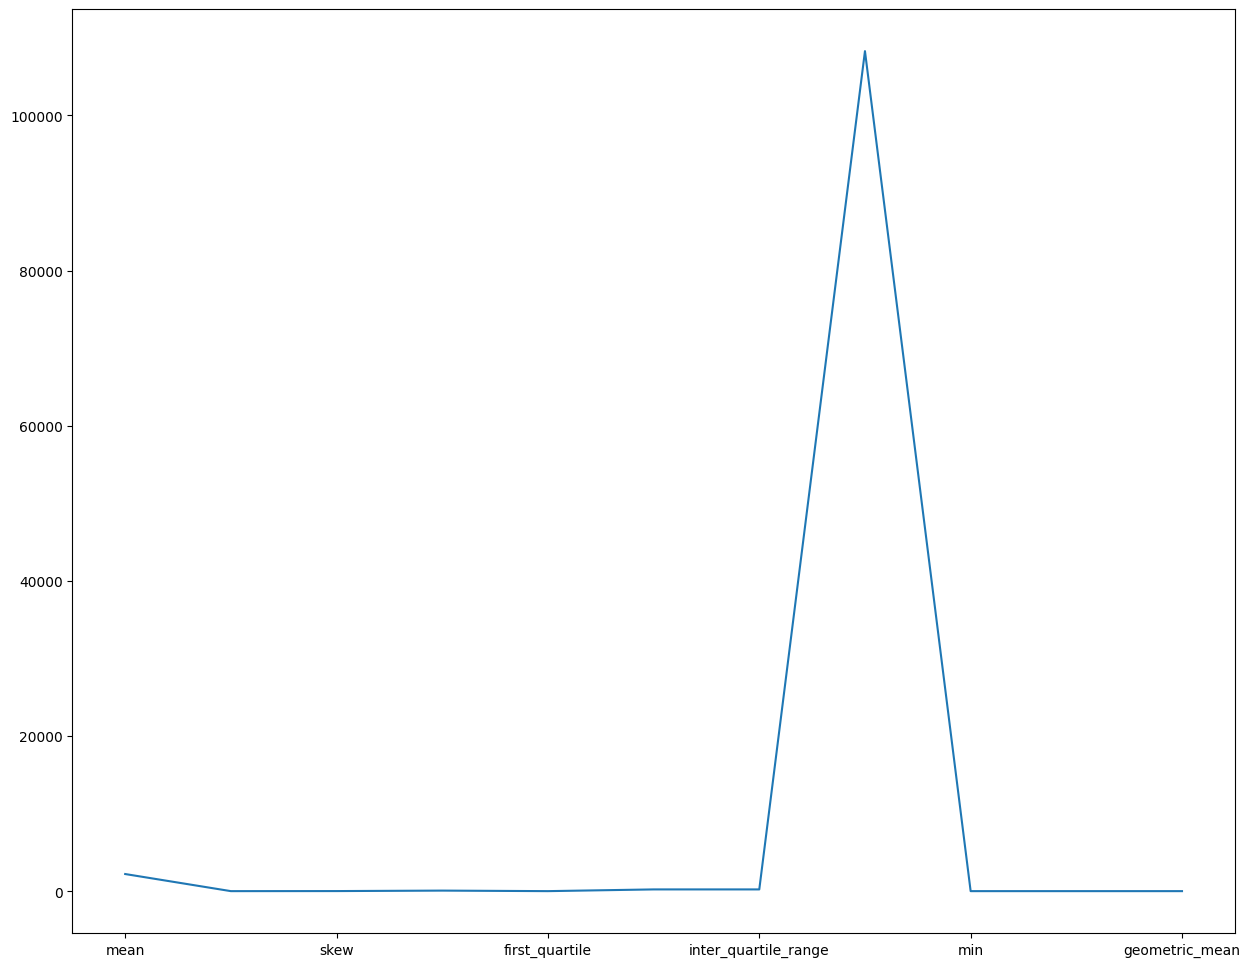

In [74]:
Statastics_Data.iloc[1,:11].plot()